In [1]:
import numpy as np 
import csv
import pandas as pd
from matplotlib import pyplot as plt

import sys
import os

In [2]:
nj = (os.getcwd()=='C:\\Users\\80002036\\Dropbox (CEDIA)\\Modeles\\srd\\TEMI\\notebooks')

if nj :
    sys.path.append('C:/Users/80002036/Documents/GitHub/srd')
    sys.path.append('C:/Users/80002036/Documents/GitHub/srpp')
    print('Utilisateur : NJ')

if not nj:
    sys.path.append('C:/Users/roger/Documents/GitHub/srd')
    sys.path.append('C:/Users/roger/Documents/GitHub/srpp')
    print('Utilisateur : Roger')

Utilisateur : Roger


## Importation du module

In [3]:
import srd

## Intialisation d'un ménage

On doit d'abord initialiser un ménage. Ici nous supposerons un couple avec deux membres ayant l'âge de 45 ans et des revenus de travail de 50,000\$ et 25,000\$ respectivement. 

In [4]:
jean = srd.Person(age=45,earn=50e3)
pauline = srd.Person(age=45,earn=25e3)

On les insère dans un ménage vivant au Québec

In [5]:
hh = srd.Hhold(jean,pauline,prov='qc')

On peut voir le profil de chacun des membres du ménage en utilisant vars(): 

In [6]:
vars(jean)

{'age': 45,
 'male': True,
 'inc_earn': 50000.0,
 'inc_self_earn': 0,
 'inc_work_month': [4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667,
  4166.666666666667],
 'prev_inc_work': 50000.0,
 'inc_rpp': 0,
 'inc_cpp': 0,
 'net_cap_gains': 0,
 'prev_cap_losses': 0,
 'cap_gains_exempt': 0,
 'inc_othtax': 0,
 'inc_othntax': 0,
 'div_elig': 0,
 'div_other_can': 0,
 'inc_rrsp': 0,
 'con_rrsp': 0,
 'con_non_rrsp': 0,
 'con_rpp': 0,
 'union_dues': 0,
 'donation': 0,
 'gift': 0,
 'years_can': 27,
 'disabled': False,
 'widow': False,
 'med_exp': 0,
 'ndays_chcare_k1': 0,
 'ndays_chcare_k2': 0,
 'asset': 0,
 'months_crb': 0,
 'months_ei': 0,
 'oas_years_post': 0,
 'months_cesb': 0,
 'months_cerb': 0,
 'pub_drug_insurance': False,
 'tax_shield': False,
 'student': False,
 'essential_worker': False,
 'emp_temp_constraints':

## Calcul de l'impôt fédéral

On doit d'abord créer un rapport d'impôt pour une année en particulier. 

In [7]:
from srd import federal
fed_form = federal.form(2022)

On peut voir les différents paramètres du système fiscal en utilisant encore vars()

In [8]:
vars(fed_form)

{'div_elig_factor': 1.38,
 'div_other_can_factor': 1.15,
 'div_elig_cred_rate': 0.150198,
 'div_other_can_cred_rate': 0.090313,
 'cap_gains_rate': 0.5,
 'qpip_deduc_rate': 0.43786,
 'basic_amount_poor': 14398.0,
 'basic_amount_rich': 12719.0,
 'age_cred_amount': 7898.0,
 'min_age_cred': 65,
 'age_cred_exempt': 39826.0,
 'age_cred_claw_rate': 0.15,
 'empl_cred_max': 1287.0,
 'pension_cred_amount': 2000.0,
 'pension_cred_min_age_split': 65,
 'disability_cred_amount': 8870.0,
 'med_exp_nr_cred_max_age': 18,
 'med_exp_nr_cred_max_claw': 2479.0,
 'med_exp_nr_cred_rate': 0.03,
 'donation_frac_net': 0.75,
 'donation_low_cut': 200.0,
 'donation_high_cut': 216511.0,
 'donation_low_rate': 0.15,
 'donation_med_rate': 0.29,
 'donation_high_rate': 0.33,
 'rate_non_ref_tax_cred': 0.15,
 'rate_abatment_qc': 0.165,
 'ccb_young': 6997.0,
 'ccb_old': 5903.0,
 'ccb_max_num_ch': 4,
 'ccb_cutoff_1': 32797.0,
 'ccb_cutoff_2': 71060.0,
 'ccb_rate_1_1ch': 0.07,
 'ccb_rate_1_2ch': 0.135,
 'ccb_rate_1_3ch': 0.1

On remplit le rapport d'impôt à l'aide de la fonction file(). 

In [11]:
from srd import tax
tax_form = tax(2022)
tax_form.compute(hh)

On peut visualiser un rapport d'impôt sommaire qui est rattaché à chaque personne

In [12]:
jean.fed_return

{'gross_income': 50000.0,
 'deductions_gross_inc': 348.75,
 'net_income': 49651.25,
 'deductions_net_inc': 0.0,
 'taxable_income': 49651.25,
 'gross_tax_liability': 7447.6875,
 'non_refund_credits': 2856.45,
 'refund_credits': 757.5541875,
 'net_tax_liability': 3833.6833125000003}

In [13]:
pauline.fed_return

{'gross_income': 25000.0,
 'deductions_gross_inc': 161.25,
 'net_income': 24838.75,
 'deductions_net_inc': 0.0,
 'taxable_income': 24838.75,
 'gross_tax_liability': 3725.8125,
 'non_refund_credits': 2590.4249999999997,
 'refund_credits': 187.33893750000004,
 'net_tax_liability': 948.0485625000002}

## Expérience

On peut faire des expériences assez complexe. La première serait de regader l'impôt fédéral payé si on incrémente les revenus de travail

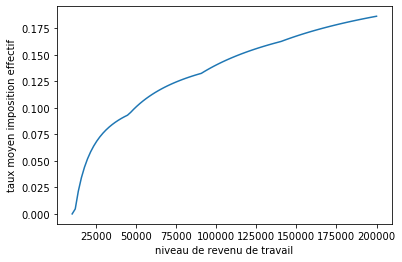

In [11]:
earns = np.linspace(10e3,200e3,100)
atrs = []
for earn in earns:
    jean.inc_earn = earn
    fed_form.file(hh)
    atrs.append(jean.fed_return['net_tax_liability']/jean.fed_return['gross_income'])
from matplotlib import pyplot as plt
plt.figure()
plt.plot(earns,atrs)
plt.xlabel('niveau de revenu de travail')
plt.ylabel('taux moyen imposition effectif')
plt.show()

On peut ajouter des enfants au ménage à l'aide de la fonction *add_dependent()*.

In [14]:
emma = srd.Dependent(age=4, child_care=2000, med_exp=500)
alex = srd.Dependent(age=14, school=4000)
hh.add_dependent(emma,alex)

On peut ensuite calculer le nouveau formulaire d’impôt pour les deux adultes de la famille.

In [15]:
tax_form.compute(hh)
jean.fed_return

{'gross_income': 50000.0,
 'deductions_gross_inc': 348.75,
 'net_income': 49651.25,
 'deductions_net_inc': 0.0,
 'taxable_income': 49651.25,
 'gross_tax_liability': 7447.6875,
 'non_refund_credits': 2856.45,
 'refund_credits': 4584.0466875,
 'net_tax_liability': 7.190812499999993}

In [16]:
pauline.fed_return

{'gross_income': 25000.0,
 'deductions_gross_inc': 2161.25,
 'net_income': 22838.75,
 'deductions_net_inc': 0.0,
 'taxable_income': 22838.75,
 'gross_tax_liability': 3425.8125,
 'non_refund_credits': 2590.4249999999997,
 'refund_credits': 3964.3314375,
 'net_tax_liability': -3128.9439374999997}

On peut voir les différents attributs du ménage en utilisant encore *vars()*:

In [17]:
vars(hh)

{'sp': [<srd.actors.Person at 0x2ce1bbd19d0>,
 'couple': True,
 'prev_fam_net_inc_prov': None,
 'prov': 'qc',
 'dep': [<srd.actors.Dependent at 0x2ce1c23f460>,
 'nkids_0_6': 1,
 'nkids_7_16': 1,
 'nkids_0_17': 2,
 'nkids_0_18': 2,
 'n_adults_in_hh': 2,
 'elig_split': False,
 'sa_elig_asset': True,
 'nkids_0_5': 1,
 'nkids_6_17': 1}

On peut faire des expériences assez complexes. Une première consisterait par exemple à regarder l’impôt fédéral payé si on augmente les revenus de travail par petites tranches.

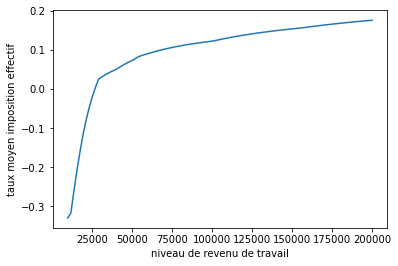

In [18]:
import numpy as np
from matplotlib import pyplot as plt

earns = np.linspace(10e3,200e3,100)
atrs = []
for earn in earns:
    jean = srd.Person(age=45,earn=earn)
    hh = srd.Hhold(jean, prov='qc')
    tax_form.compute(hh)
    atrs.append(jean.fed_return['net_tax_liability']/jean.fed_return['gross_income'])

plt.figure()
plt.plot(earns,atrs)
plt.xlabel('niveau de revenu de travail')
plt.ylabel('taux moyen imposition effectif')
plt.show()

On peut aussi faire une expérience dans laquelle on change un paramètre du système d’imposition. Supposons par exemple qu’on augmente le montant de base:


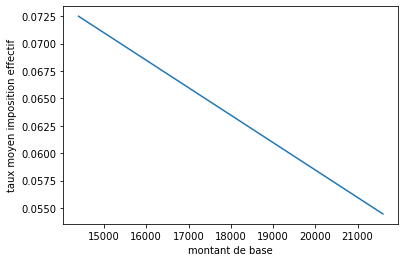

In [19]:
base = np.linspace(1.0,1.5,10)
atrs = []
bases = []
jean.inc_earn = 50e3
base_amount = tax_form.federal.basic_amount_poor
for b in base:
    tax_form.federal.basic_amount_poor = base_amount * b
    bases.append(tax_form.federal.basic_amount_poor)
    tax_form.compute(hh)
    atrs.append(jean.fed_return['net_tax_liability']/jean.fed_return['gross_income'])

plt.figure()
plt.plot(bases,atrs)
plt.xlabel('montant de base')
plt.ylabel('taux moyen imposition effectif')
plt.show()

On peut aussi faire une expérience ou on change un paramètre du système d'imposition. Supposons qu'on change le montant de base en l'augmentant

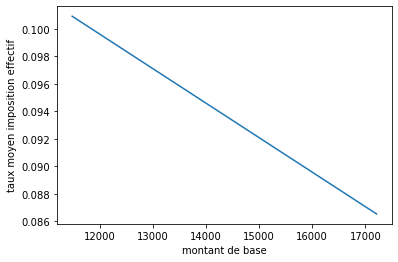

In [12]:
base = np.linspace(1.0,1.5,10)
atrs = []
bases = []
jean.inc_earn = 50e3
base_amount = fed_form.basic_amount
for b in base:
    fed_form.basic_amount = base_amount*b
    bases.append(fed_form.basic_amount)
    fed_form.file(hh)
    atrs.append(jean.fed_return['net_tax_liability']/jean.fed_return['gross_income'])
from matplotlib import pyplot as plt
plt.figure()
plt.plot(bases,atrs)
plt.xlabel('montant de base')
plt.ylabel('taux moyen imposition effectif')
plt.show()